# Week 48

In [2]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 6)
import numpy as np

------------------------------------------------------------------------

## Interpretation of binding data.

In [4]:
import numpy as np

The `week48_1_interpret.xlsx` contains a protein binding dataset.

#### (a) Load the dataset

Load the dataset using the widget below

In [5]:
import numpy as np
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [6]:
df = uploader.get_dataframe()
display(df)

#### (b) SI Units

Add a new column to the `DataFrame` with the ligand concentration in SI
units.

In [8]:
... # Replace ... with your code.
display(df)

#### (c) Plot the data

Make plots of the binding data directly with a linear and logarithmic
x-axis.

Estimate $K_D$ by visual inspection of these plots!

In [10]:
import matplotlib.pyplot as plt

# This makes a figure with two axes.
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Can with [0] to plot in the first axis.
ax = axes[0]
ax.plot(..., ..., 'o') # Replace ... with your code.
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)

ax = axes[1]
... # Put some code here - perhaps you can copy it from somewhere?
ax.set_xscale('log') # This make the x-axis logarithmic.

> **Note**
>
> Ths command `ax.set_xscale('log')` tells `matplotlib` that we want the
> x-axis to use a log-scale.

In [12]:
k_d_estimate = ...

#### (d) Make a fit

Make a fit to determine $K_D$, as always we start by implementing the
function to fit with

In [14]:
def ... # Give the function an appropriate name.
    return ... # Implement the expression for nbar

And then we can make the fit

In [16]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = ... # Choose x-data from the dataframe
y = ... # Choose y-data from the dataframe

# Initial guess
p0 = [k_d_estimate]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = ... # Call the curve_fit function.

# Print the parameters
k_d_fit = popt[0]
print(f"{k_d_fit = :e}")

#### Compare

Use the figure below to compare your guess with the fitted value.

#### Saturation

Based on the value of $K_D$ found from the fit,

-   At which concentration do you expect 10% saturation?
-   At which concentration do you expect 90% saturation?

------------------------------------------------------------------------

## Determination of type and strength of cooperativity

In [19]:
import matplotlib.pyplot as plt
import numpy as np

The binding of NAD+ to the protein yeast glyceraldehyde 3-phosphate
dehydrogenase (GAPDH) was studied using equilibrium dialysis. The enzyme
concentration was 71 μM. The concentration of
$[\text{NAD}^{+}_\text{free}]$ and the corresponding values of $\bar{n}$
were determined with the resulting data found in the dataset
`week48_2_determination_coop.xlsx`.

#### (a) Load the dataset

Load the dataset using the widget below

In [20]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [21]:
df = uploader.get_dataframe()
display(df)

#### (b) Averaging and units.

Start by adding a new column to the `DataFrame` with the average value
of $\bar{n}$ across the three series

> **Tip**
>
> Remember that you can set a new column based on a computation using
> one or more other columns, e.g. 
>
> ``` python
> df['new_col'] = df['col1'] + df['col2']
> ```

In [23]:
df['nbar_avg'] = ...

Now also add a column with the ligand concentration in SI units with the
column-name `[NAD+free]_(M)`.

In [25]:
... # Your code here. 
display(df)

Finally, set the concentration of the GADPH in SI units

In [27]:
 c_gadph = 71 * 10**(-6)

#### (c) Plot

Make a plot of the average $\bar{n}$ as a function of
$[\text{NAD}^{+}_\text{free}]$.

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))

# Your code to plot here.
... 

# This sets the labels.
ax.set_xlabel(r'$[\text{NAD}^{+}_\text{free}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
plt.show()

#### (d) Scatchard plot

Make a Scatchard plot based on the average $\bar{n}$.

In [30]:
# Calculate nbar / L 
nbar_over_L = ...

fig, ax = plt.subplots(figsize=(6, 4)) 

ax.plot(..., ... 'o') # Plot the right thins. 

ax.set_xlabel(r'$\bar{n}$', fontsize=14)
ax.set_ylabel(r'$\bar{n}/L$', fontsize=14)
ax.set_xlim([0, df['nbar_avg'].max()*1.2])
ax.set_ylim([0, nbar_over_L.max() * 1.2])

#### (e) Binding sites

How many binding sites does GAPDH contain for $\text{NAD}^{+}$?

#### (f) Cooperativity

What type of cooperativity do the plots indicate?

#### (g) Fit

Make a fit using the functional form

$$
\bar{n} = N \frac{[L]^h}{K_D + [L]^h}
$$

As usual, start by defining the function in Python

In [33]:
def n_bar(L, N, k_d, h):
    # Replace ... with your code.
    # Be careful with parentheses.
    result = ...
    return result 

Now we can fit

In [34]:
from scipy.optimize import curve_fit

# This selects the '[NAD+free]_(m)'-column three times and stitches it together.
x = np.concatenate([df['[NAD+free]_(M)'], df['[NAD+free]_(M)'], df['[NAD+free]_(M)']])
# Do the same to stitch together the nbar1, nbar2 and nbar3 columns.
y = ...

# Initial guess
p0 = [..., ..., ...]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = curve_fit(n_bar, x, y, p0=p0, bounds=bounds)

# Print the parameters
N_fit, k_d_fit, h_fit = popt
print(f"{N_fit = :.3f}")
print(f"{k_d_fit = :e}")
print(f"{h_fit = :.3f}")

> **Note**
>
> The function `np.concatenate` takes a number of arrays and makes a new
> array that consisting of the originals one after each other. For
> example,
>
> ``` python
> A = np.array([1, 2, 3])
> B = np.array([4, 5, 6])
> C = np.concatenate([A, B])
> print(C)
> ```
>
>     [1 2 3 4 5 6]

#### (h) Plot with fit

In [37]:
L = np.linspace(0, df['[NAD+free]_(M)'].max()*1.5)
n_bar_fit = n_bar(L, N_fit, k_d_fit, h_fit)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, 'o', label='Data')
ax.plot(L, n_bar_fit, '-', label='Fit')
ax.axhline(N_fit, color='C2', label='N from fit')
ax.axvline(k_d_fit, color='C3', label=r'$K_D$ from fit')
ax.set_xlabel(r'$[\text{NAD}^{+}_\text{free}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.legend()
plt.show()

------------------------------------------------------------------------

## Determination of reaction orders.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

#### (a) Load the dataset

Load the dataset `week48_4_reaction_order.xlsx` using the widget below

In [40]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [41]:
df = uploader.get_dataframe()
display(df)

#### (b) SI units.

Add two new columns with the concentrations given in M.

In [43]:
# Make the new columns in this cell. 


display(df)

#### (c) Plotting

For each reactant make a plot of

-   $t$ vs. $[\text{A}]$

> **Note**
>
> We will be adding more elements to the plot in the following parts of
> the exercise, therefore we will wrap the code for plotting in a
> function such that it can be easily reused.

The cell below defines the function for plotting, add the missing code
in places with `...`.

In [45]:
def plot_dataframe(ax, df):
    # Extract from dataframe
    t = df['Time_(s)']
    A1 = df['[A1]_(M)']
    A2 = df['[A2]_(M)']

    ax.plot(t, A1, 'o', label='[A1]')
    ... # Your code here to plot A2

    for ax in axes:
        ax.set_xlabel('t [s]')
        ax.legend()

Once we’ve written the plotting function we can make the plot as done in
the cell below.

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_dataframe(ax, df)

#### (d) Determining reaction orders

Now we want to determine the reaction orders by making fits to the data
under the assumption of different integrated rate laws.

In the cell below finish the code to define functions for the integrated
rate laws of zeroth, first and second order.

In [49]:
def zeroth_order(t, k, A0):
    result = ...
    return result

def first_order(t, k, A0):
    result = ...
    return result

def second_order(t, k, A0):
    result = ...
    return result

rate_laws = {0: zeroth_order, 1: first_order, 2:second_order}

We can then use these to make fits, here it is helpful to define a small
function to help us with that.

In [51]:
from scipy.optimize import curve_fit

def make_fit(x_data, y_data, x_eval, A0, order):
    # Don't worry about this line for now. 
    # It just picks the correct function for the given order and sets A0.
    func = lambda t, k: rate_laws[order](t, k, A0)

    # Make fit
    popt, pcov = curve_fit(func, x_data, y_data)

    # Evaluate fit
    k = popt[0]
    y_fit = func(x_eval, k)
    return k, y_fit

Next we will define the known constants and extract a few things from
the `DataFrame`. In the cell below put the initial concentrations in M.

In [52]:
A1_0 = ... # Set the initial concentration [A1]_0
A2_0 = ... # Set the initial concentration [A2]_0

# Extract data
t = df['Time_(s)']
A1 = df['[A1]_(M)']
A2 = df['[A2]_(M)']
orders = [0, 1, 2]
t_eval = np.linspace(0, t.max()*1.1)

Now we can make and plot the fits

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True, layout='constrained')

axes[0].set_ylabel('Concentration (M)')

for ax in axes:
    plot_dataframe(ax, df)

for ax, order in zip(axes, orders):
    k1, y_fit = make_fit(t, A1, t_eval, A1_0, order)
    ax.plot(t_eval, y_fit, color='C2', label=rf'k = {k1:.2e}')

    k2, y_fit = make_fit(t, A2, t_eval, A2_0, order)
    ax.plot(t_eval, y_fit, color='C3', label=rf'k = {k2:.2e}')
    ax.legend()
    ax.set_title(f'Reaction order: {order}')

Based on this plot;

-   What do you believe is the reaction order for \[A1\]?
-   What is the unit of the rate constant for \[A1\]?
-   What do you believe is the reaction order for \[A2\]?
-   What is the unit of the rate constant for \[A2\]?

> **Note**
>
> The cell above used a `for`-loop. These are a powerful way of
> performing the same operation with different inputs, you will learn
> more about them later on.

#### (e) Residuals

By inspecting the plot we can make a qualitative judgement of the
reaction orders. To get a more quantitative results we can look at the
residuals, recall they are defined as

$$
r_i = y_i - f(x_i | \theta)
$$

We can calculate these in much the same way we calculate the fits,
except we don’t evaluate the fit at a new set of points but at the
observations $x_i$.

In [56]:
def calculate_residuals(x_data, y_data, A0, order):
    # Don't worry about this line for now. 
    # It just picks the correct function for the given order and sets A0.
    func = lambda t, k: rate_laws[order](t, k, A0)

    # Make fit
    popt, pcov = curve_fit(func, x_data, y_data)


    # Evaluate fit
    k = popt[0]
    y_fit = ... # Calculate the fit at the x_data using `func`
    residuals = ... # Calculate the residuals.
    return residuals

We can then plot the residuals, here using a histogram where the x-axis
is the value of the residual and the bars indicate the number of
residuals within that range of values.

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(8, 4), sharey=True, layout='constrained', sharex=True)

axes[0, 0].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')

for ax_col, order in zip(axes.T, orders):

    residuals = calculate_residuals(t, A1, A1_0, order)
    ax_col[0].hist(residuals, alpha=0.75, color='C0')

    residuals = calculate_residuals(t, A2, A2_0, order)
    ax_col[1].hist(residuals, alpha=0.75, color='C1')

    ax_col[1].set_xlabel('Residual')

Does this support your conclusions about the reaction order from (d)?

------------------------------------------------------------------------

## Analysis of a reversible reaction

In [60]:
import matplotlib.pyplot as plt
import numpy as np

Consider the following reaction

$$
A \underset{k_{2}}{\stackrel{k_1}{\rightleftharpoons}} B
$$

The magnitudes of the rate constants are $k_1 = 10 \ \mathrm{s}^{-1}$
and $k_2 = 1 \ \mathrm{s}^{-1}$.

#### (a) Reaction order

What is the reaction order in each direction?

#### (b) Derive equilibrium constant

Show mathematically how the equilibrium constant $K_{\mathrm{eq}}$ is
given by the ratio between the two rate constants.

#### (c) Calculate $K_{\mathrm{eq}}$

In [61]:
k1 = ...
k2 = ...
K_eq = ...
print(f"{K_eq = }")

#### (d) Equilibrium concentrations

Calculate the concentrations of A and B at equilibrium,
$[\mathrm{A}]_{\mathrm{eq}}$ and $[\mathrm{B}]_\mathrm{eq}$, if
$[\mathrm{A}]_0 = 10^{-3} \text{M}$

In [63]:
A0 = ...
A_eq = ...
B_eq = ...
print(f"{A_eq = }")
print(f"{B_eq = }")

#### (e) Rates at equilibrium

Calculate the forward and reverse rates at equilibrium at this
concentration.

In [65]:
r_fwd = A_eq * k1
r_bwd = B_eq * k2
print(f"{r_fwd = :.5f}")
print(f"{r_bwd = :.5f}")

#### (f) Initial rate of formation

If $[\mathrm{A}]_0 = 10^{-3} \text{M}$ and
$[\mathrm{B}]_0 = 0 \text{M}$, calculate the initial rate of formation
of B.

In [67]:
r_fwd = A0 * k1
print(f"{r_fwd = :.5f}")

r_fwd = 0.01000

#### (g) Time-dependence

![](https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_48/reversible_reaction.png)

We now want to calculate and plot the time-dependent concentrations
using the above equations.

In the cell below finish the implementation of the function `A_time`
that calculates the concentration \[A\] as a function of time.

In [69]:
def A_time(t, A0, k_f, k_b):
    return ...

> **Caution**
>
> Be careful to correctly set parantheses when implementing this
> function!

And then we can use that function to calculate and plot the
concentrations as a function of time.

In [71]:
fig, ax = plt.subplots()

t_max = ... # Set the time in seconds
t = np.linspace(0, t_max, 100)

At = ... # Use your function to calculate [A](t)
Bt = ... # Calculate [B](t)

ax.plot(t, At, label='[A](t)')
ax.plot(t, Bt, label='[B](t)')
ax.set_ylabel('Concentrations (M)')
ax.set_xlabel('Time (s)')
ax.legend()

------------------------------------------------------------------------

## Determination of reaction order and activation energy

In [73]:
import numpy as np  
import matplotlib.pyplot as plt

The irreversible isomerization of compound A to compound B results in a
decreasing absorbance. The isomerization was followed in a time course
at two different temperatures (T1 = 25 °C and T2 = 40 °C). The
absorbance ($\epsilon$ = 16700 $\mathrm{cm}^{-1} \mathrm{M}^{-1}$) was
used to calculate the concentration of compound A in a spectrophotometer
with a pathlength of 1 cm. The obtained dataset is given in the file
`week48_7_reaction_order_activation.csv`.

#### (a) Temperatures

What are the two temperatures in Kelvin? Set them as varilabes in the
cell below.

In [74]:
T1 = 25 + 273.15
T2 = 40 + 273.15

#### (b) Load the dataset

Load the dataset using the widget below

In [76]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [77]:
df = uploader.get_dataframe()
display(df)

#### (c) SI Units

Calculate the concentration of A at each timepoint in SI units, by
adding new columns to the `DataFrame`.

In [79]:
extinction_coeff = ...
L = 1 # Path length

df['[A]_(M)_25C'] = ... # For 25 C
... # For 40 C
display(df)

#### (d) Plot the data

We will be resuing the plot, so we will put the code for it in a
function.

In [81]:
def plot_dataframe(ax, df):
    # Extract from dataframe
    t = ...
    A_25 = ...
    A_40 = ...

    # First subfigure: t vs [A]
    ax.plot(..., ..., 'o', label='[A]_25C')
    ... # Add the code to plot the 40C data.
    ax.set_xlabel('t (s)')
    ax.set_ylabel('[A] (M)')
    ax.legend()

You can run this next cell to see your plot and adjust as neccesarry.

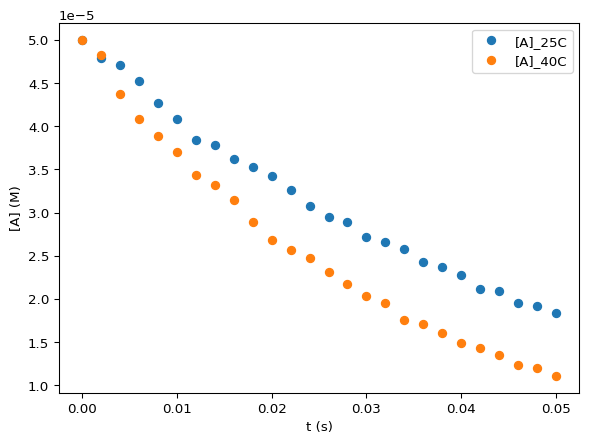

In [83]:
fig, ax = plt.subplots()
plot_dataframe(ax, df)

#### (e) Determine reaction order

In the exercise on “Determination of reaction orders” we saw how we can
fit to the expressions for the integrated rate laws to determine the
reaction order.

In that exercise we wrote the functions in the next two cells, we will
reuse them here

In [84]:
def zeroth_order(t, k, A0):
    return A0 - k*t

def first_order(t, k, A0):
    return A0 * np.exp(-k*t)

def second_order(t, k, A0):
    return A0 / (1 + 2*k*t*A0)

rate_laws = {0: zeroth_order, 1: first_order, 2:second_order}

In [85]:
from scipy.optimize import curve_fit

def make_fit(x_data, y_data, x_eval, A0, order):
    func = lambda t, k: rate_laws[order](t, k, A0)
    popt, pcov = curve_fit(func, x_data, y_data)

    # Evaluate fit at new points
    k = popt[0]
    y_fit_new = func(x_eval, k)
    
    # Evaluate fit at data-points to calculate residuals
    y_fit_data = func(x_data, k)
    residuals = y_data - y_fit_data

    return k, y_fit_new, residuals

Now we need to set a few things before we can do the fitting

In [86]:
t = ... # Extract the time from the dataframe
A_25 = ... # Extract the concentration at 25C
A_40 = ... # Extract the concentration at 40C
A0_25 = ... # Set the initial concentration at 25C
A0_40 = ... # Set the initial concentration at 40C

> **Tip**
>
> You’ve already calculated the initial concentration, it is contained
> in the `DataFrame`.

Now we can use our plotting and fitting functions to analyze the data

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharey='row', layout='constrained')

for ax in axes.T:
    plot_dataframe(ax[1], df)

orders = [0, 1, 2]
t_eval = np.linspace(0, t.max()*1.05)

for ax_col, order in zip(axes.T, orders):
    # Calculate the fits
    k25, y_fit_25, residuals_25 = make_fit(t, A_25, t_eval, A0_25, order)
    k40, y_fit_40, residuals_40 = make_fit(t, A_40, t_eval, A0_40, order)

    # Plot the fits
    ax = ax_col[1]
    ax.plot(t_eval, y_fit_25, color='k')
    ax.plot(t_eval, y_fit_40, color='k')
    ax.text(0.05, 0.15, f'k (25 C) = {k25:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.05, f'k (40 C) = {k40:.4f}', transform=ax.transAxes)

    ax.legend()

    # Plot the residuals
    ax = ax_col[0]
    ax.hist(residuals_25, facecolor='C0', alpha=0.75, edgecolor='k', label='25 C')
    ax.hist(residuals_40, facecolor='C1', alpha=0.75, edgecolor='k', label='40 C')
    ax.set_xlabel('Residual')    
    ax.set_ylabel('Count')
    ax.legend()

    ax.set_title(f'Reaction order: {order}')

Based on these plots

-   What do you think the reaction order of the reaction is?
-   What’s the rate constant?
-   What the unit of the rate constant?

#### (f) Half-life

What is the half-life of the reaction at these temperatures and is it
constant through-out the reaction?

#### (g) Activation energy

With the assumption that the Arrhenius constant A and the activation
energy are temperature independent in the interval measured, use the
Arrhenius equation to calculate the activation energy of the
isomerization of the compound A.

Perform the calculation in the cell below.

In [90]:
...

------------------------------------------------------------------------

## The pH effect on an active site histidine residue

Assume that a compound R can react with the unprotonated form of
Histidine, $\text{His}$, to form a covalent reaction product,
$\text{P}$: $$
\text{His} + \text{R} \rightarrow \text{P}
$$

The protonated form of Histidine, $\text{HisH}^+$, is in equilibrium
with $\text{His}$:

$$
\text{HisH}^+ \rightleftharpoons \text{His} + \text{H}^+
$$

The pKa value for this acid-base equilibrium is 6.0. Further assume that
the total concentration of Histidine, is

$$
[\text{HisH}^+] + [\text{His}] = 10^{-3} \ \text{M}
$$

#### (a) Percentage unprotonated

Using the Henderson-Hasselbach equation, calculate the percentage of
unprotonated Histidine, $\text{His}$, at pH 6.0.

In [91]:
pKa = ...
pH = ...

... # Possible intermediate calculation, otherwise delete this line.

percentage_unprotonated = ...
print(f"{percentage_unprotonated = } %")

#### (b) Concentration

Calculate $[\text{His}]$ at pH 6

In [93]:
total_conc = ...
his_conc = ...
print(f"{his_conc = } M")

#### (c) Reaction order

The reaction equation for the reaction between $\text{His}$ and
$\text{R}$ is

$$
v = - \frac{d[\text{His}]}{dt} = k \cdot [\text{His}] \cdot [\text{R}]
$$

What’s the reaction order?

#### (d) High concentrations

If $[\text{R}]$ is much higher than $[\text{His}]$, what can then be
concluded regarding the order of the reaction?

#### (e) New rate constant

Show how a new rate constant, $k'$, can be defined in these conditions.
How does $k'$ depend on $\text{R}$?

#### (f) SI Units

At pH 6.0 the reaction rate $v = 1 \ \text{mM}\cdot \text{s}^{-1}$ and
constant $[\text{R}] = 0.2 \ \text{M}$

Convert the reaction rate to SI-units given in
$\text{M}\cdot \text{s}^{-1}$.

In [95]:
...

#### (g) Calculate the rate constant

Use the concentration of $[\text{His}]$ at pH 6 calculated in question
(b) and calculate the rate constant k.

In [96]:
...